## SAT_Exam Analysis

### Importing the required packages

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
import missingno as mino

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import the data
exam=pd.read_csv("SAT_Exam.csv")

In [3]:
exam.head() # To print the first 5 rows

,General_knowledge,Aptitude,Mathematics,Science,SAT
0,73,71,74,73,144
1,93,90,60,97,186
2,89,94,97,98,182
3,96,93,115,110,208
4,73,68,87,83,157


In [4]:
#shape of data
exam.shape

(96, 5)

In [6]:
#description of data 
exam.describe()

,General_knowledge,Aptitude,Mathematics,Science,SAT
count,96.000000,96.000000,96.00000,96.000000,96.000000
mean,79.854167,79.916667,76.25000,76.802083,155.968750
std,12.230229,12.189440,22.41569,22.925793,32.427881
min,46.000000,46.000000,6.00000,3.000000,70.000000
25%,74.000000,74.000000,65.00000,65.000000,140.000000
50%,80.000000,81.000000,77.00000,79.000000,157.500000
75%,88.250000,89.000000,90.25000,92.000000,180.000000
max,97.000000,101.000000,125.00000,124.000000,223.000000


In [7]:
pd.DataFrame(exam.kurtosis(),columns=['kurtosis'])

,kurtosis
General_knowledge,0.604407
Aptitude,0.888228
Mathematics,0.750723
Science,0.655287
SAT,0.552747


In [8]:
exam.kurtosis()


General_knowledge     0.604407
Aptitude              0.888228
Mathematics           0.750723
Science               0.655287
SAT                   0.552747
dtype: float64

In [9]:
exam.columns

Index(['General_knowledge ', 'Aptitude ', 'Mathematics ', 'Science ', 'SAT'], dtype='object')

In [10]:
exam['Aptitude ']


0     71
1     90
2     94
3     93
4     68
      ..
91    83
92    88
93    93
94    83
95    73
Name: Aptitude , Length: 96, dtype: int64

In [11]:
pd.DataFrame(exam.skew(),columns=['skewness'])

,skewness
General_knowledge,-0.826330
Aptitude,-0.916175
Mathematics,-0.496929
Science,-0.566476
SAT,-0.646051


In [12]:
exam.columns=exam.columns.str.replace(' ','')
exam.columns

Index(['General_knowledge', 'Aptitude', 'Mathematics', 'Science', 'SAT'], dtype='object')

In [13]:
#checking if there is any null value
exam.isnull().sum()

General_knowledge    0
Aptitude             0
Mathematics          0
Science              0
SAT                  0
dtype: int64

<AxesSubplot:>

<Figure size 1440x360 with 0 Axes>

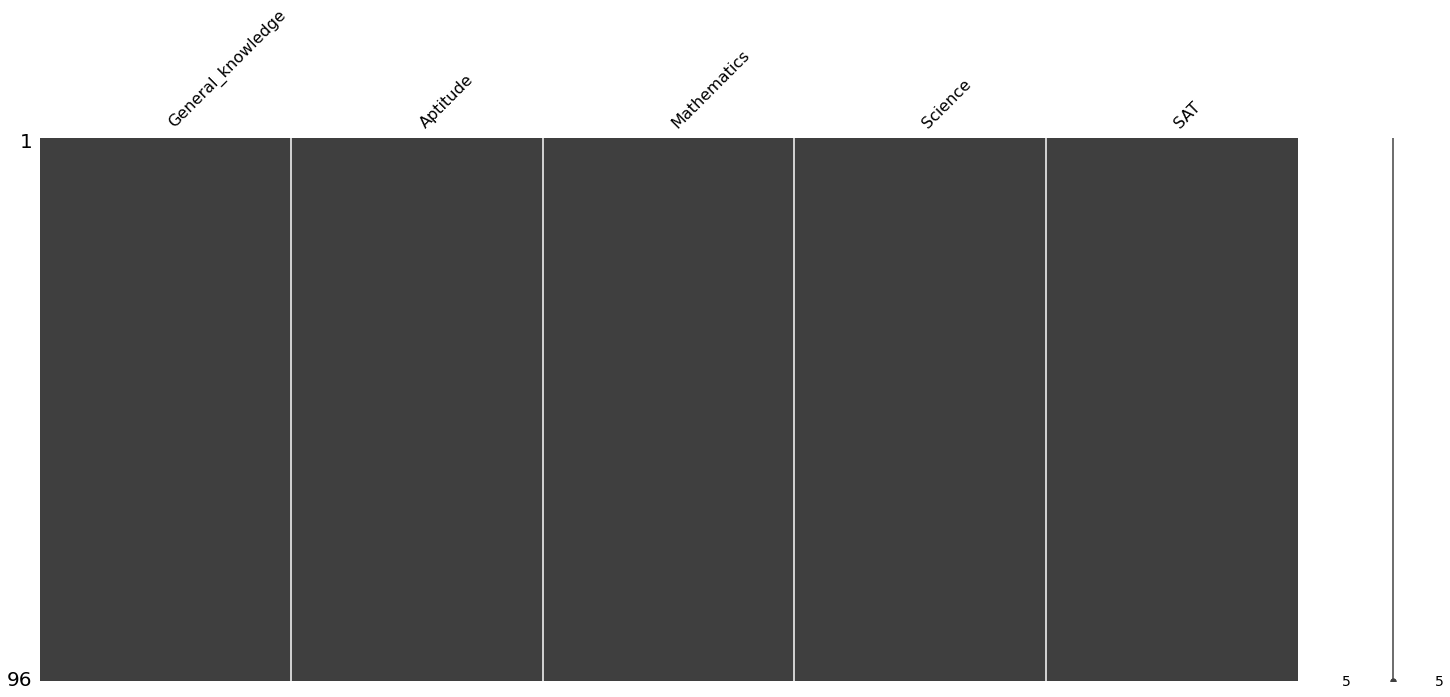

In [14]:
#nullity matrix is a data-dense display which lets you quickly visually 
#pick out patterns in data completion.
plt.figure(figsize=(20,5))
mino.matrix(exam)

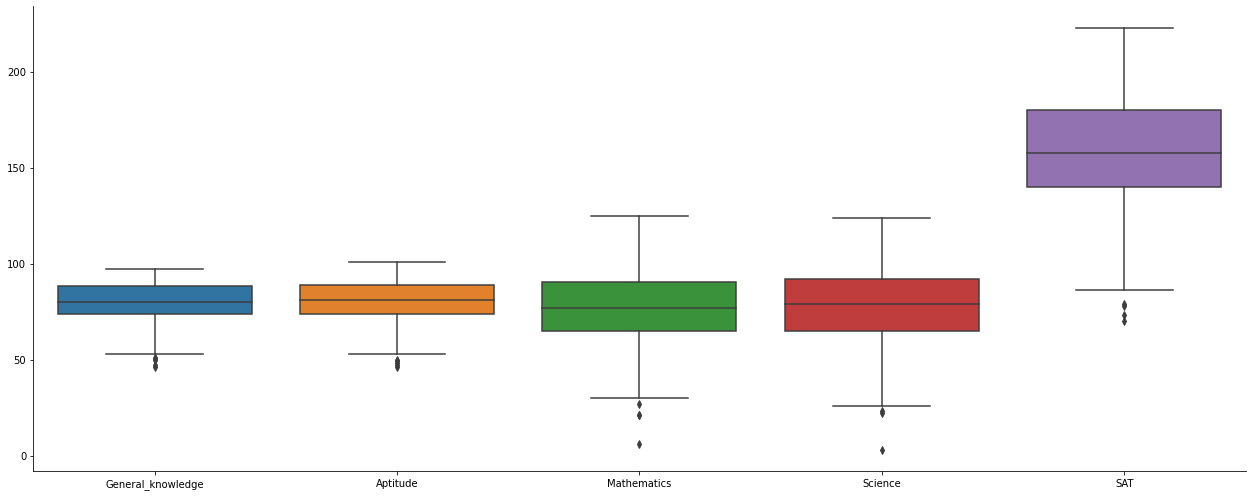

In [15]:
# Construct box plot
sns.catplot(data=exam , kind='box' , height=7, aspect=2.5)

# Univariate analysis

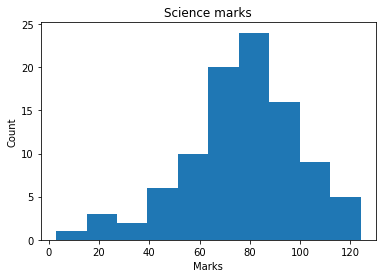

In [16]:
#we can see most of the students scored between 60-90,minimum marks is also very less)
plt.hist(exam['Science'])
plt.xlabel('Marks')
plt.ylabel('Count')
plt.title('Science marks')
plt.show()

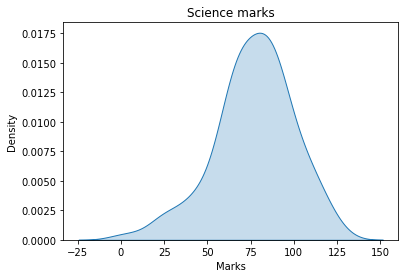

In [17]:
sns.kdeplot(exam["Science"],shade=True)
plt.xlabel('Marks')
plt.title('Science marks');

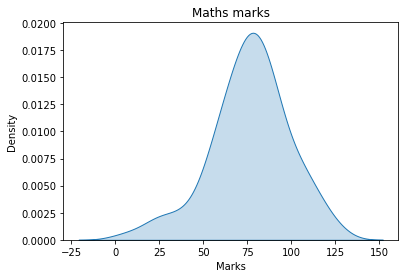

In [35]:
sns.kdeplot(exam["Mathematics"],shade=True)
plt.xlabel('Marks')
plt.title('Maths marks');

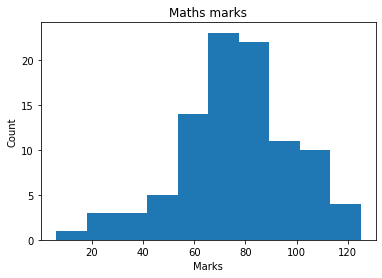

In [36]:
plt.hist(exam['Mathematics'])
plt.xlabel('Marks')
plt.ylabel('Count')
plt.title('Maths marks')
plt.show()

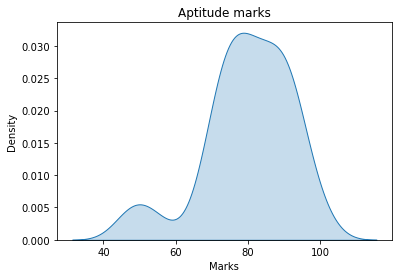

In [37]:
sns.kdeplot(exam["Aptitude"],shade=True)
plt.xlabel('Marks')
plt.title('Aptitude marks')
plt.show()

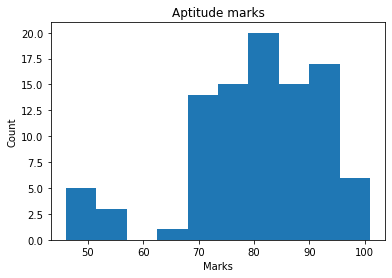

In [39]:
plt.hist(exam['Aptitude'])
plt.xlabel('Marks')
plt.ylabel('Count')
plt.title('Aptitude marks')
plt.show()

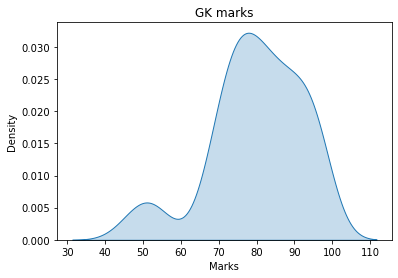

In [40]:
sns.kdeplot(exam["General_knowledge"],shade=True)
plt.xlabel('Marks')
plt.title('GK marks')
plt.show()

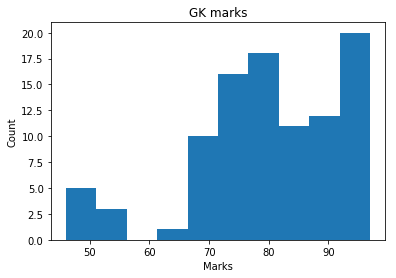

In [20]:
plt.hist(exam['General_knowledge'])
plt.xlabel('Marks')
plt.ylabel('Count')
plt.title('GK marks')
plt.show()

(array([ 4.,  4.,  3.,  4., 15., 25., 16., 16.,  4.,  5.]),
 array([ 70. ,  85.3, 100.6, 115.9, 131.2, 146.5, 161.8, 177.1, 192.4,
        207.7, 223. ]),
 <a list of 10 Patch objects>)

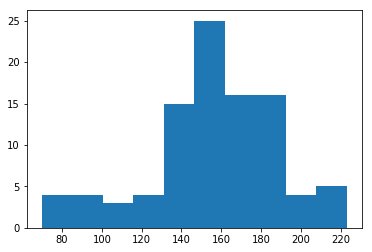

In [21]:
plt.hist(exam['SAT'])

# Bivariate Analysis

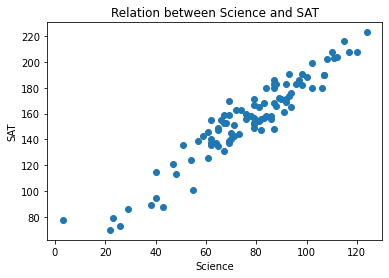

In [41]:
#checking the relationship between two variables - Science marks(independent variable) and SAT(dependent variable)
plt.scatter(x='Science',y='SAT',data=exam)
plt.xlabel('Science')
plt.ylabel('SAT')
plt.title('Relation between Science and SAT')
plt.show()
#we can see that most of the science marks lie in 70-100 area and corresponding to that SAT marks lie in 140-200 area
#we can also see some of the outliers

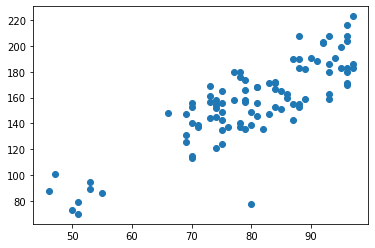

In [42]:
#checking the relationship between two variables - GK marks(independent variable) and SAT(dependent variable)
plt.scatter(x='General_knowledge',y='SAT',data=exam)

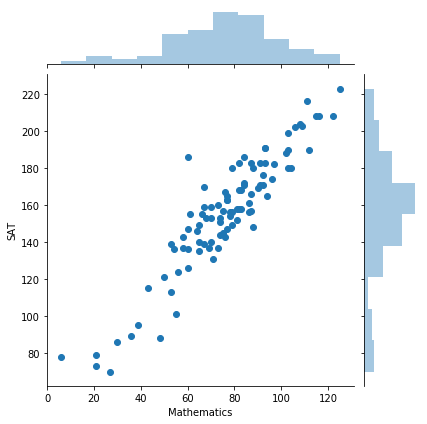

In [24]:
#for bivariate analysis we can also use joinplot - in this we can see how points and scattered and their distribution also
sns.jointplot(x='Mathematics',y='SAT',data=exam)

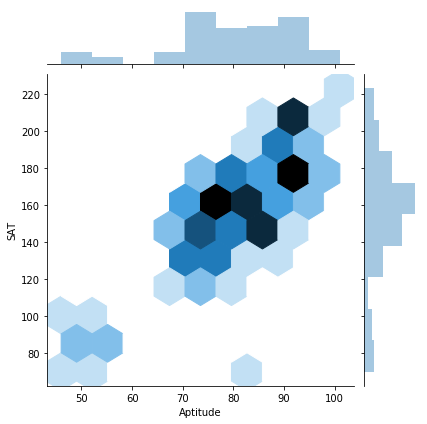

In [25]:
sns.jointplot(x='Aptitude',y='SAT',data=exam,kind='hex')

# Multivariate Analysis

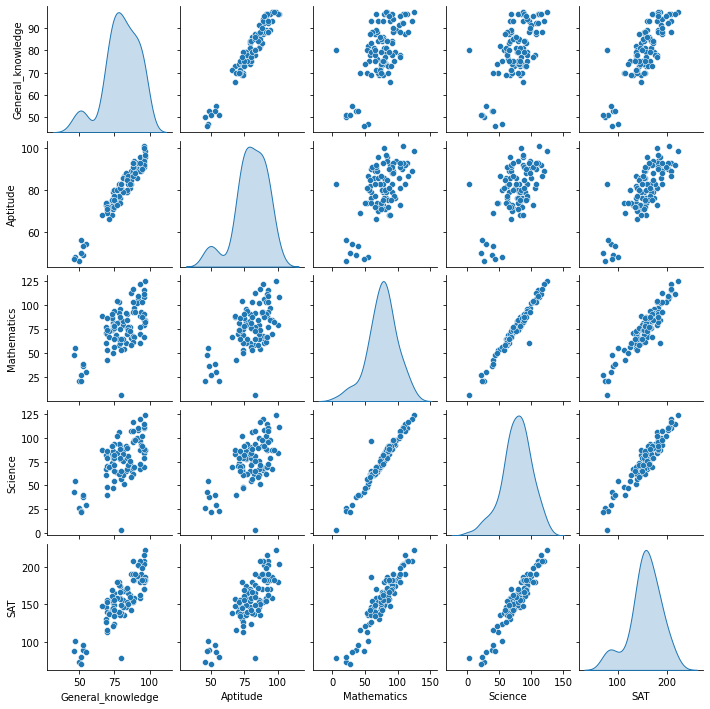

In [19]:
#by using pairplot we can see the relation between all the variable together
sns.pairplot(exam,height=2,diag_kind='kde')

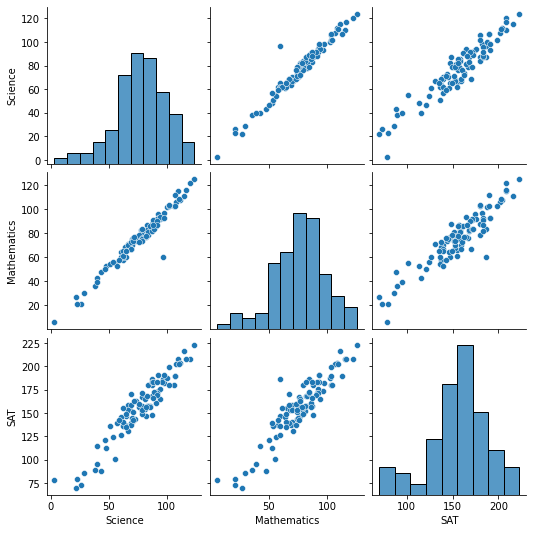

In [20]:
#we can also take limited variables
sns.pairplot(exam,vars=['Science','Mathematics','SAT'])

# Correlation

In [22]:
#correlation
exam.corr()

,General_knowledge,Aptitude,Mathematics,Science,SAT
General_knowledge,1.000000,0.963232,0.622769,0.640775,0.838191
Aptitude,0.963232,1.000000,0.590701,0.607482,0.797194
Mathematics,0.622769,0.590701,1.000000,0.976331,0.926694
Science,0.640775,0.607482,0.976331,1.000000,0.949496
SAT,0.838191,0.797194,0.926694,0.949496,1.000000


In [23]:
exam.cov()

,General_knowledge,Aptitude,Mathematics,Science,SAT
General_knowledge,149.578509,143.598246,170.731579,179.665570,332.426974
Aptitude,143.598246,148.582456,161.400000,169.762281,315.113158
Mathematics,170.731579,161.400000,502.463158,501.734211,673.607895
Science,179.665570,169.762281,501.734211,525.591996,705.888487
SAT,332.426974,315.113158,673.607895,705.888487,1051.567434


<AxesSubplot:>

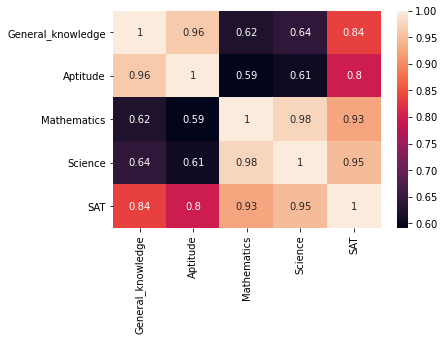

In [29]:
sns.heatmap(exam.corr(),annot=True)

# Model Building

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
#seperating data into independent variables and dependent variable
exam_ind=exam.iloc[:,0:4]
exam_dep=exam.iloc[:,4]
print(exam_ind)
print(exam_dep)

    General_knowledge  Aptitude  Mathematics  Science
0                  73        71           74       73
1                  93        90           60       97
2                  89        94           97       98
3                  96        93          115      110
4                  73        68           87       83
5                  53        49           36       38
6                  69        73           71       67
7                  47        48           55       55
8                  87        89           66       66
9                  79        76           83       78
10                 69        73           77       82
11                 70        74           53       48
12                 93        96           70       67
13                 79        76           96       93
14                 70        70           70       70
15                 93        92           88       87
16                 78        82           58       62
17                 81       

In [32]:
#splitting the dataset into train and test
exam_ind_train,exam_ind_test,exam_dep_train,exam_dep_test=train_test_split(exam_ind,exam_dep,test_size=0.3,random_state=0)

In [33]:
#fitting linear regression
regressor=LinearRegression(normalize=True)
regressor.fit(exam_ind_train,exam_dep_train)

LinearRegression(normalize=True)

In [34]:
print(regressor.intercept_)
print(regressor.coef_)

-2.6959423734850247
[ 1.12043666 -0.08620657  0.03621845  0.95293196]


In [35]:
#prediction
pred = regressor.predict(exam_ind_test)
print(pred)

[186.94370719 165.11391398 185.82002461  87.50699513 155.37953665
 171.94647294 138.81162999 154.59468616 128.53685757 145.77814436
  72.29678184 161.57324095 139.4247108  171.36649808 100.2299379
 153.41857936 170.45067353 158.58673269 147.60366582 152.3935894
 136.19295783 144.85105295 205.8364035  155.83677428 157.35706391
 139.49619204 134.73905889 178.25037974 196.83030287]


In [36]:
df = pd.DataFrame({'Actual': exam_dep_test, 'Predicted': pred})
df

,Actual,Predicted
26,191,186.943707
84,170,165.113914
2,182,185.820025
55,88,87.506995
68,151,155.379537
81,172,171.946473
16,137,138.811630
78,156,154.594686
54,126,128.536858
66,143,145.778144


In [37]:
score=r2_score(exam_dep_test,pred)
score

0.9899690508884422

In [38]:
from sklearn import metrics

In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(exam_dep_test, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(exam_dep_test, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(exam_dep_test, pred)))

Mean Absolute Error: 2.380784331468059
Mean Squared Error: 8.538711247887134
Root Mean Squared Error: 2.9221073299738896


## Building Linear Regression using OLS Method
- While Splitting the data into Train and Test we have to add a constant column 

In [42]:
import statsmodels.api as sm
#splitting the dataset into train and test
exam_ind=sm.add_constant(exam_ind)
exam_ind_train,exam_ind_test,exam_dep_train,exam_dep_test=train_test_split(exam_ind,exam_dep,test_size=0.3,random_state=0)
print(exam_ind_train)

    const  General_knowledge  Aptitude  Mathematics  Science
75    1.0                 96        91           91       88
60    1.0                 92        93          109      111
79    1.0                 51        50           27       22
85    1.0                 88        87          116      117
91    1.0                 80        83           65       65
51    1.0                 96       100           79       84
27    1.0                 97        99          125      124
18    1.0                 88        89           68       68
56    1.0                 87        83          112      107
63    1.0                 88        91           61       62
73    1.0                 96        94           84       79
1     1.0                 93        90           60       97
61    1.0                 81        79           83       83
42    1.0                 93        89          122      120
41    1.0                 84        80           76       79
4     1.0               

In [43]:
import statsmodels.api as sm
from scipy import stats
model_ols=sm.OLS(exam_dep_train,exam_ind_train).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    SAT   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1831.
Date:                Sun, 27 Sep 2020   Prob (F-statistic):           1.39e-63
Time:                        15:05:44   Log-Likelihood:                -169.93
No. Observations:                  67   AIC:                             349.9
Df Residuals:                      62   BIC:                             360.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.6959      2.77

In [44]:
exam_pred_train=model_ols.predict(exam_ind_train)
pd.DataFrame(exam_pred_train,columns=['Train_data_predicted_values'])

,Train_data_predicted_values
75,184.175071
60,202.090278
79,72.078400
85,204.096892
91,144.078622
51,179.152862
27,220.142833
18,155.492327
56,193.647088
63,149.348793


In [45]:
pd.DataFrame({'predicted_train_values':exam_pred_train,'Actual__train_values':exam_dep_train})

,predicted_train_values,Actual__train_values
75,184.175071,183
60,202.090278,203
79,72.078400,70
85,204.096892,208
91,144.078622,149
51,179.152862,180
27,220.142833,223
18,155.492327,153
56,193.647088,190
63,149.348793,155


In [46]:
exam_pred_test=model_ols.predict(exam_ind_test)
pd.DataFrame(exam_pred_test,columns=['Test_data_predicted_values'])

,Test_data_predicted_values
26,186.943707
84,165.113914
2,185.820025
55,87.506995
68,155.379537
81,171.946473
16,138.811630
78,154.594686
54,128.536858
66,145.778144


In [47]:
pd.DataFrame({'Predicted_test_values':exam_pred_test,'Actual__test_values':exam_dep_test})

,Predicted_test_values,Actual__test_values
26,186.943707,191
84,165.113914,170
2,185.820025,182
55,87.506995,88
68,155.379537,151
81,171.946473,172
16,138.811630,137
78,154.594686,156
54,128.536858,126
66,145.778144,143


### Calculating MAE,MSE,RMSE for Test Data of OLS method

In [48]:
print('Mean Absolute Error:', metrics.mean_absolute_error(exam_dep_test, exam_pred_test))  
print('Mean Squared Error:', metrics.mean_squared_error(exam_dep_test, exam_pred_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(exam_dep_test, exam_pred_test)))

Mean Absolute Error: 2.3807843314680683
Mean Squared Error: 8.538711247887166
Root Mean Squared Error: 2.922107329973895


### Calculating MAE,MSE,RMSE for Train Data of OLS method

In [49]:
print('Mean Absolute Error:', metrics.mean_absolute_error(exam_dep_train, exam_pred_train))  
print('Mean Squared Error:', metrics.mean_squared_error(exam_dep_train, exam_pred_train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(exam_dep_train,exam_pred_train)))

Mean Absolute Error: 2.604378958269699
Mean Squared Error: 9.342668953550602
Root Mean Squared Error: 3.056577980937277


In [50]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(exam_ind.values, i) for i in range(exam_ind.shape[1])]
vif["VIF Predictors"] = exam_ind.columns
vif

,VIF Factor,VIF Predictors
0,46.662643,const
1,14.865286,General_knowledge
2,13.884816,Aptitude
3,21.385071,Mathematics
4,22.217766,Science


- Multicollinearity always exists in pairs.
- Here the Multicollinearity exists between General_Knowledge and Aptitude.
- Mathematics and Science also has multicollinearity.
- It's good to drop the variables with high VIF from the pair so that the other one get's adjusted.
- Let's drop General_Knowledge and Science and build the model using Aptitude and Mathematics

In [51]:
exam_ind_Mul=exam[['Aptitude','Mathematics']]
exam_dep_Mul=exam.iloc[:,4]

In [52]:
#splitting the dataset into train and test
exam_ind_Mul=sm.add_constant(exam_ind_Mul)
exam_ind_train_Mul,exam_ind_test_Mul,exam_dep_train_Mul,exam_dep_test_Mul=train_test_split(exam_ind_Mul,exam_dep_Mul,test_size=0.3,random_state=0)

In [53]:
model_ols_Mul=sm.OLS(exam_dep_train_Mul,exam_ind_train_Mul).fit()
print(model_ols_Mul.summary())

                            OLS Regression Results                            
Dep. Variable:                    SAT   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     647.9
Date:                Sun, 27 Sep 2020   Prob (F-statistic):           3.36e-43
Time:                        15:05:48   Log-Likelihood:                -227.69
No. Observations:                  67   AIC:                             461.4
Df Residuals:                      64   BIC:                             468.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3610      6.062      0.060      

In [54]:
exam_pred_train_Mul=model_ols_Mul.predict(exam_ind_train_Mul)
pd.DataFrame(exam_pred_train_Mul,columns=['Train_data_predicted_values'])

,Train_data_predicted_values
75,182.013493
60,202.422877
79,76.570584
85,203.784618
91,147.574892
51,178.431786
27,224.660604
18,156.473790
56,195.799892
63,151.231578


In [55]:
pd.DataFrame({'predicted_train_values':exam_pred_train_Mul,'Actual__train_values':exam_dep_train_Mul})

,predicted_train_values,Actual__train_values
75,182.013493,183
60,202.422877,203
79,76.570584,70
85,203.784618,208
91,147.574892,149
51,178.431786,180
27,224.660604,223
18,156.473790,153
56,195.799892,190
63,151.231578,155


In [56]:
exam_pred_test_Mul=model_ols_Mul.predict(exam_ind_test_Mul)
pd.DataFrame(exam_pred_test_Mul,columns=['Test_data_predicted_values'])

,Test_data_predicted_values
26,182.125385
84,158.358079
2,191.080229
55,95.207571
68,160.689937
81,169.010340
16,139.422328
78,158.450938
54,133.713514
66,142.332681


In [57]:
pd.DataFrame({'Predicted_test_values':exam_pred_test_Mul,'Actual__test_values':exam_dep_test_Mul})

,Predicted_test_values,Actual__test_values
26,182.125385,191
84,158.358079,170
2,191.080229,182
55,95.207571,88
68,160.689937,151
81,169.010340,172
16,139.422328,137
78,158.450938,156
54,133.713514,126
66,142.332681,143


In [58]:
print('Mean Absolute Error:', metrics.mean_absolute_error(exam_dep_test_Mul, exam_pred_test_Mul))  
print('Mean Squared Error:', metrics.mean_squared_error(exam_dep_test_Mul, exam_pred_test_Mul))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(exam_dep_test_Mul, exam_pred_test_Mul)))

Mean Absolute Error: 4.607693894428587
Mean Squared Error: 36.25480672608528
Root Mean Squared Error: 6.021196453038654


In [59]:
print('Mean Absolute Error:', metrics.mean_absolute_error(exam_dep_train_Mul, exam_pred_train_Mul))  
print('Mean Squared Error:', metrics.mean_squared_error(exam_dep_train_Mul, exam_pred_train_Mul))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(exam_dep_train_Mul,exam_pred_train_Mul)))

Mean Absolute Error: 5.235541981968882
Mean Squared Error: 52.39211682138705
Root Mean Squared Error: 7.238239898026802


In [60]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(exam_ind_Mul.values, i) for i in range(exam_ind_Mul.shape[1])]
vif["VIF Predictors"] = exam_ind_Mul.columns
vif

,VIF Factor,VIF Predictors
0,44.781009,const
1,1.535927,Aptitude
2,1.535927,Mathematics


In [61]:
import numpy as np


### Predicting the values for unforeseen data using the model built using Sklearn Regressor

In [73]:
print('Enter Below values to predict the SAT score')
Constant=float(input('Enter Value for Constant: '))
General_knowledge=int(input('Enter Value for General_knowledge: '))
Aptitude=int(input('Enter Value for Aptitude: '))
Mathematics=int(input('Enter Value Mathematics: '))
Science=int(input('Enter Value Science: '))
my_array = np.array([Constant,General_knowledge,Aptitude,Mathematics,Science])
print('predicted Value for SAT score',model_ols.predict(my_array.reshape(1, -1)))

Enter Below values to predict the SAT score
Enter Value for Constant: 1.0
Enter Value for General_knowledge: 56
Enter Value for Aptitude: 78
Enter Value Mathematics: 56
Enter Value Science: 77
predicted Value for SAT score [128.72839218]


### Predicting the SAT score for unforeseen data using OLS Regressor

In [75]:
print('Enter Below values to predict the SAT score')
Constant=float(input('Enter Value for Constant: '))
General_knowledge=int(input('Enter Value for General_knowledge: '))
Aptitude=int(input('Enter Value for Aptitude: '))
Mathematics=int(input('Enter Value Mathematics: '))
Science=int(input('Enter Value Science: '))
my_array = np.array([Constant,General_knowledge,Aptitude,Mathematics,Science])
print('predicted Value for SAT score',model_ols.predict(my_array.reshape(1, -1)))

Enter Below values to predict the SAT score
Enter Value for Constant: 1.0
Enter Value for General_knowledge: 46
Enter Value for Aptitude: 76
Enter Value Mathematics: 87
Enter Value Science: 78
predicted Value for SAT score [119.77214272]


In [76]:
pip install lmdiag


The following command must be run outside of the IPython shell:

    $ pip install lmdiag

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [79]:
import lmdiag

https://www.analyticsvidhya.com/blog/2013/12/residual-plots-regression-model/

<module 'matplotlib.pyplot' from '/Users/jasmeetsingh/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

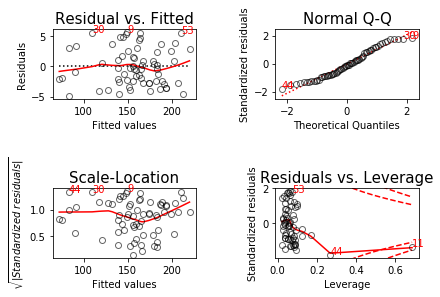

In [80]:
lmdiag.plot(model_ols)

<module 'matplotlib.pyplot' from '/Users/jasmeetsingh/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

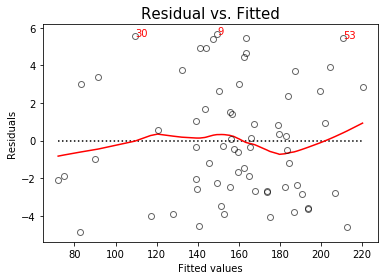

In [81]:
lmdiag.resid_fit(model_ols)



<module 'matplotlib.pyplot' from '/Users/jasmeetsingh/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

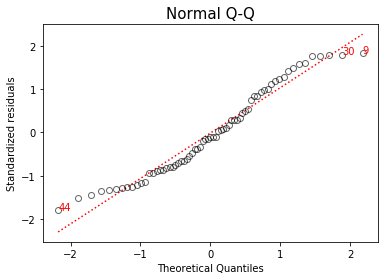

In [82]:
lmdiag.q_q(model_ols)



<module 'matplotlib.pyplot' from '/Users/jasmeetsingh/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

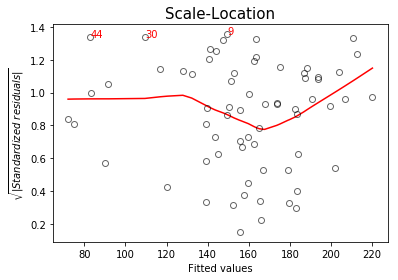

In [83]:
lmdiag.scale_loc(model_ols)



<module 'matplotlib.pyplot' from '/Users/jasmeetsingh/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

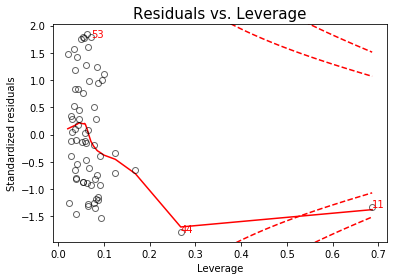

In [84]:
lmdiag.resid_lev(model_ols)

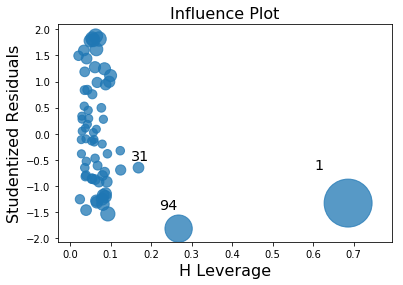

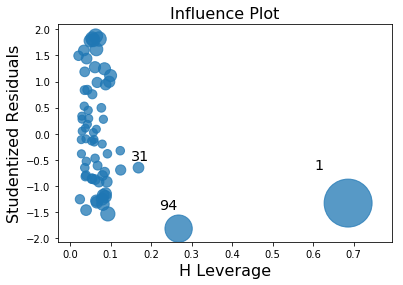

In [85]:
sm.graphics.influence_plot(model_ols)